# 그래프 실습 문제집 (연습용)

이 노트북은 `graph_practice_dataset.csv` 데이터를 이용해 그래프 이론에서 다룬 시각화들을 모두 연습하도록 구성되었습니다.

포함 그래프 유형:
1. Line Plot (추세)
2. Bar Chart (범주 비교)
3. Grouped Bar (범주+세그먼트 비교)
4. Pie Chart (비율)
5. Histogram (분포)
6. Box Plot (이상치/중앙값)
7. Scatter Plot (상관관계)
8. Heatmap (행/열 매핑)
9. Twin Axis (서로 다른 단위)
10. Log Scale 시각화
11. 강조 색상 하이라이트
12. Annotation(주석)
13. 3C 원칙(명확성/일관성/맥락)

※ 먼저 아래 셀을 실행해 데이터프레임을 불러오세요.


In [1]:
import warnings
import numpy as np 
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/04_graph_practice_dataset.csv', encoding='cp949')
df['날짜'] = pd.to_datetime(df['날짜'])
df.head()

,날짜,지역,제품,매출,이익,고객수,카테고리
0,2024-01-31,서울,A,182,34.916660,930.986807,전자
1,2024-02-29,서울,A,131,21.843166,998.727403,전자
2,2024-03-31,서울,A,172,22.114619,1203.880436,전자
3,2024-04-30,서울,A,94,21.636703,491.932862,전자
4,2024-05-31,서울,A,186,20.698511,1835.592633,전자


## 문제 1️⃣: 월별 전체 매출 추세 (Line Plot)

- `날짜`별 총 `매출`을 선 그래프로 나타내세요.
- `marker='o'`, `linewidth=2`, `grid=True`를 적용하세요.
- 그래프 제목: `월별 매출 추이`

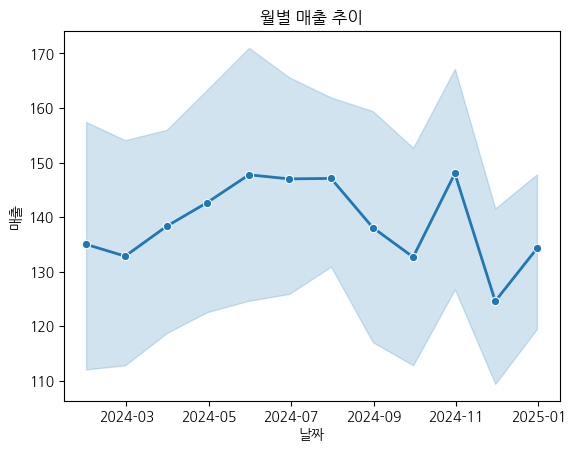

In [2]:
# TODO: 월별 매출 추세 그래프를 그리세요.
plt.figure()
sns.lineplot(data=df, x='날짜', y='매출', marker='o', linewidth=2)
plt.title('월별 매출 추이')
plt.grid=True
plt.show()

## 문제 2️⃣: 지역별 매출 추세 비교

- 각 `지역`별로 월별 매출 합계를 구하고 한 그래프에 여러 선으로 그리세요.
- 범례(legend)를 추가하세요.
- 제목: `지역별 월별 매출 비교`

In [3]:
df_grouped = df.groupby(['날짜', '지역'])['매출'].sum().reset_index()
df_grouped.head()

,날짜,지역,매출
0,2024-01-31,광주,483
1,2024-01-31,대구,318
2,2024-01-31,부산,390
3,2024-01-31,서울,429
4,2024-02-29,광주,406


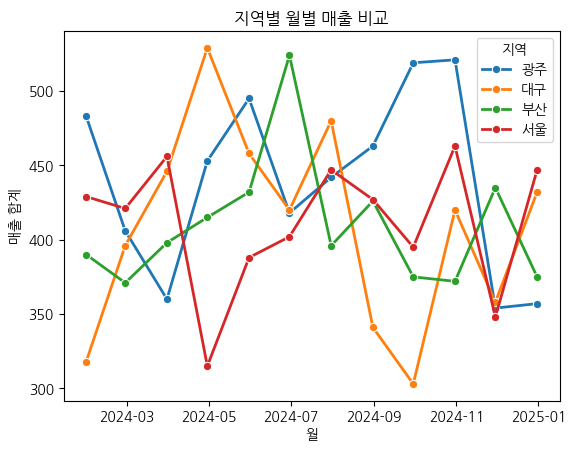

In [19]:
# TODO: 지역별 월별 매출을 선 그래프로 여러 개 겹쳐 그리세요.
plt.figure()
sns.lineplot(data=df_grouped, x='날짜', y='매출', hue='지역', marker='o', linewidth=2)
plt.title('지역별 월별 매출 비교')
plt.xlabel('월')
plt.ylabel('매출 합계')
plt.legend(title='지역')
plt.show()

## 문제 3️⃣: 지역별 평균 매출 (Bar Chart)

- `지역`별 평균 `매출`을 막대 그래프로 나타내세요.
- x축: 지역 / y축: 평균 매출
- 제목: `지역별 평균 매출`

In [29]:
df_grouped2 = df.groupby('지역')['매출'].mean().reset_index()
df_grouped2.head()

,지역,매출
0,광주,146.416667
1,대구,136.138889
2,부산,136.361111
3,서울,137.166667


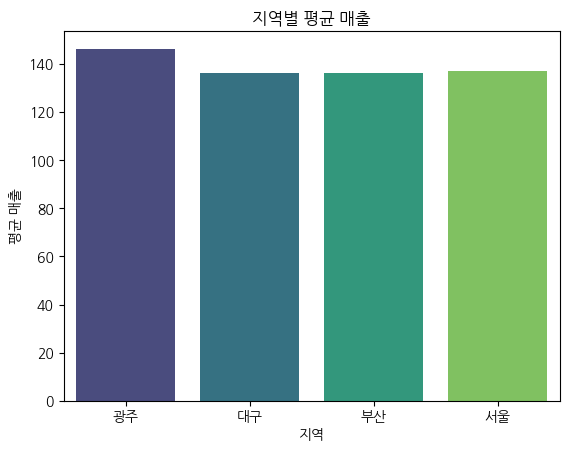

In [34]:
# TODO: 지역별 평균 매출 막대그래프를 그리세요.
plt.figure()
sns.barplot(data=df_grouped2, x='지역', y='매출', palette='viridis')
plt.title('지역별 평균 매출')
plt.xlabel('지역')
plt.ylabel('평균 매출')
plt.show()

## 문제 4️⃣: 지역 vs 제품별 매출 (Grouped Bar)

- x축에 지역을 두고, 제품을 `hue`(또는 막대 그룹)로 나누어 비교하세요.
- 지역 안에서 제품 A, B, C의 평균 매출 차이를 확인합니다.
- 제목: `지역별 제품 평균 매출 비교`

In [36]:
# TODO: 지역-제품별 평균 매출을 그룹 막대그래프로 시각화하세요.
df_grouped3 = df.groupby(['지역','제품'])['매출'].mean().reset_index()
df_grouped3.head()

,지역,제품,매출
0,광주,A,146.333333
1,광주,B,153.166667
2,광주,C,139.750000
3,대구,A,132.833333
4,대구,B,122.666667


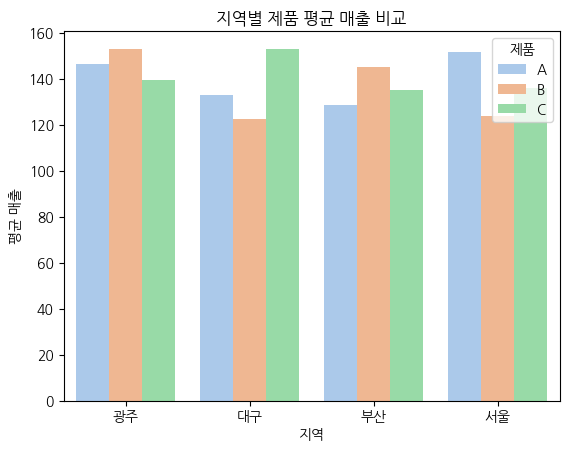

In [38]:
plt.figure()
sns.barplot(data=df_grouped3, x='지역', y='매출', hue='제품', palette='pastel')
plt.title('지역별 제품 평균 매출 비교')
plt.xlabel('지역')
plt.ylabel('평균 매출')
plt.legend(title='제품')
plt.show()

## 문제 5️⃣: 제품별 총매출 비중 (Pie Chart)

- 전체 기간 동안 제품 A, B, C가 차지하는 총 매출 비율을 원형 그래프로 나타내세요.
- `autopct='%.1f%%'` 옵션을 사용하세요.
- 제목: `제품별 매출 비중`

In [39]:
# TODO: 제품별 총매출 비중을 원형 차트로 표현하세요.
df_grouped4 = df.groupby('제품')['매출'].sum()
df_grouped4

제품
A    6712
B    6539
C    6768
Name: 매출, dtype: int64

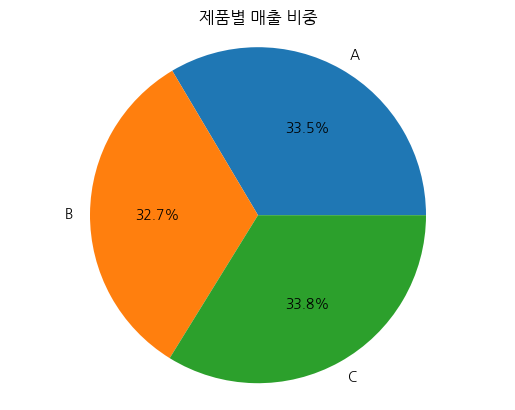

In [42]:
plt.figure()
plt.pie(df_grouped4, labels=df_grouped4.index, autopct='%.1f%%')
plt.title('제품별 매출 비중')
plt.axis('equal')  
plt.show()

## 문제 6️⃣: 이익 분포 (Histogram)

- 전체 행에 대해 `이익` 값의 분포를 히스토그램으로 그리세요.
- bin 개수는 15로 설정하세요.
- 제목: `이익 분포`

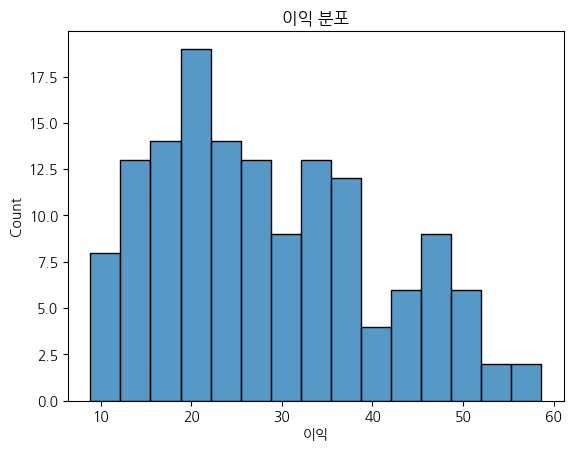

In [49]:
# TODO: 이익 분포를 히스토그램으로 시각화하세요.
plt.figure()
sns.histplot(df['이익'], bins=15)
plt.title('이익 분포')
plt.show()

## 문제 7️⃣: 제품별 이익 분포 (Box Plot)

- 제품별 `이익` 분포를 박스플롯으로 표현하세요.
- 중앙값, 이상치 등을 비교합니다.
- 제목: `제품별 이익 분포`

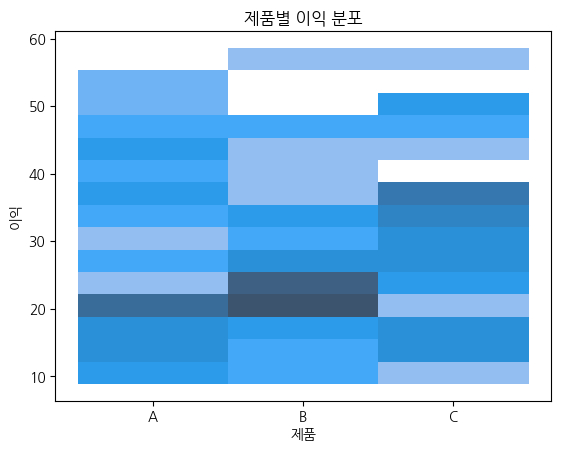

In [51]:
# TODO: 제품별 이익 분포를 박스플롯으로 시각화하세요.
plt.figure()
sns.histplot(data=df, x='제품', y='이익', bins=15)
plt.title('제품별 이익 분포')
plt.show()

## 문제 8️⃣: 매출 vs 이익 (Scatter Plot)

- x축: `매출`, y축: `이익` 산점도를 그리세요.
- 점 색깔은 `지역`에 따라 다르게 하세요.
- 제목: `매출과 이익의 관계`

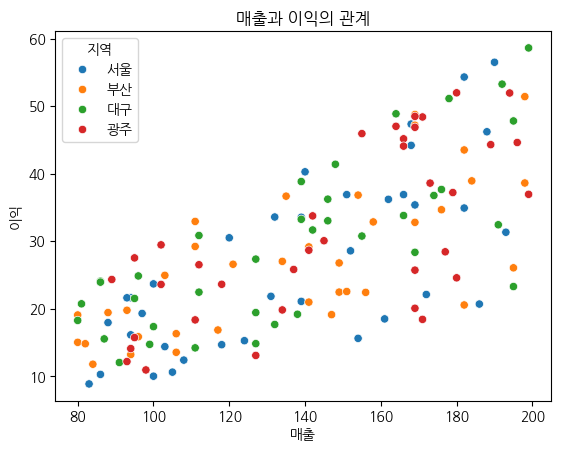

In [55]:
# TODO: 매출-이익 산점도를 그리고 지역별로 색을 구분하세요.
plt.figure()
sns.scatterplot(data=df, x='매출', y='이익', hue='지역')
plt.title('매출과 이익의 관계')
plt.show()

## 문제 9️⃣: 지역 × 제품 매출 Heatmap

- `지역`(행)과 `제품`(열)을 기준으로 평균 `매출` pivot_table을 만드세요.
- 그 결과를 heatmap으로 시각화하세요.
- 제목: `지역-제품 평균 매출 히트맵`

In [58]:
# TODO: 지역×제품 평균 매출을 피벗테이블로 만들고 heatmap으로 시각화하세요.
pivot_table = df.pivot_table(index='지역', columns='제품', values='매출', aggfunc='mean')
pivot_table

제품,A,B,C
지역,,,
광주,146.333333,153.166667,139.750000
대구,132.833333,122.666667,152.916667
부산,128.500000,145.250000,135.333333
서울,151.666667,123.833333,136.000000


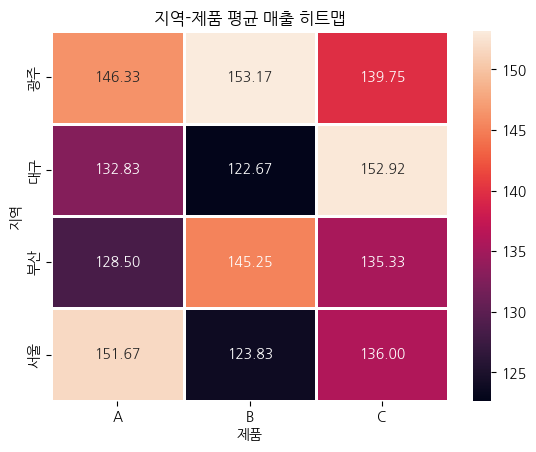

In [65]:
plt.figure()
sns.heatmap(data=pivot_table, annot=True, fmt=".2f", linewidths=1)
plt.title('지역-제품 평균 매출 히트맵')
plt.show()

## 문제 🔟: 매출 vs 고객수 (Twin Axis)

- x축은 `날짜`.
- 왼쪽 y축: 월별 총 매출 (막대그래프)
- 오른쪽 y축: 월별 총 고객수 (선 그래프)
- 제목: `월별 매출과 고객 수 추이`
- 힌트: `ax1.twinx()`

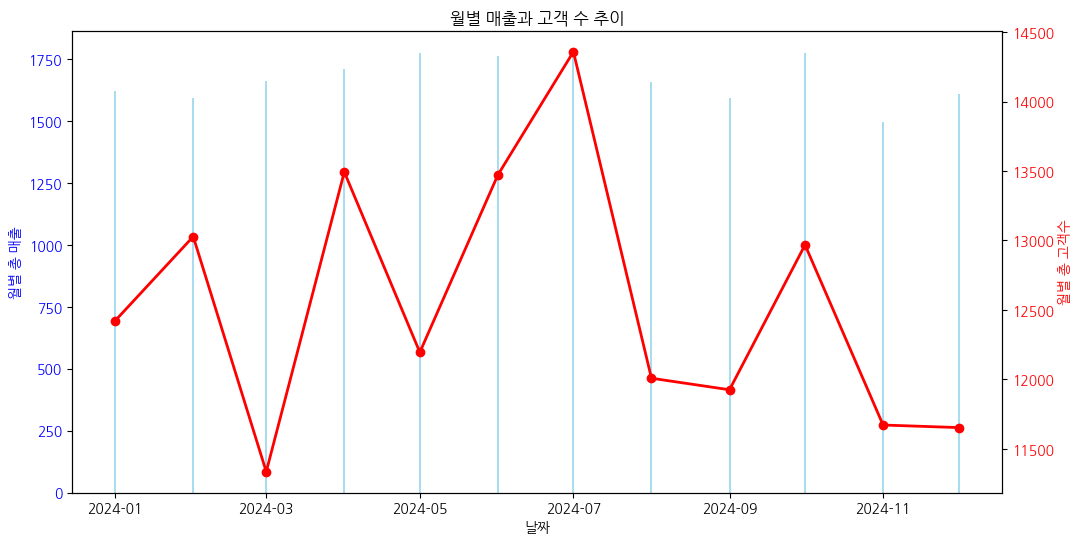

In [67]:
# TODO: 매출 막대 + 고객수 선을 twinx로 그리세요.
df['날짜'] = pd.to_datetime(df['날짜'])
monthly = df.groupby(df['날짜'].dt.to_period('M')).agg({'매출':'sum', '고객수':'sum'})
monthly.index = monthly.index.to_timestamp()  # PeriodIndex -> Timestamp

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 왼쪽 y축: 총 매출 (막대그래프)
ax1.bar(monthly.index, monthly['매출'], color='skyblue', alpha=0.7)
ax1.set_xlabel('날짜')
ax1.set_ylabel('월별 총 매출', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 오른쪽 y축: 총 고객수 (선 그래프)
ax2 = ax1.twinx()
ax2.plot(monthly.index, monthly['고객수'], color='red', marker='o', linewidth=2)
ax2.set_ylabel('월별 총 고객수', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('월별 매출과 고객 수 추이')
plt.show()

## 문제 1️⃣1️⃣: 로그 스케일 시각화

- 어떤 제품-지역 조합의 `고객수`는 다른 조합보다 훨씬 클 수 있습니다.
- `고객수` 평균을 제품별로 집계한 후 막대그래프를 그리고,
  같은 데이터를 y축을 로그 스케일(`plt.yscale('log')`)로도 시각화하세요.
- 제목: `제품별 평균 고객 수 (일반 축)` / `제품별 평균 고객 수 (로그 축)`

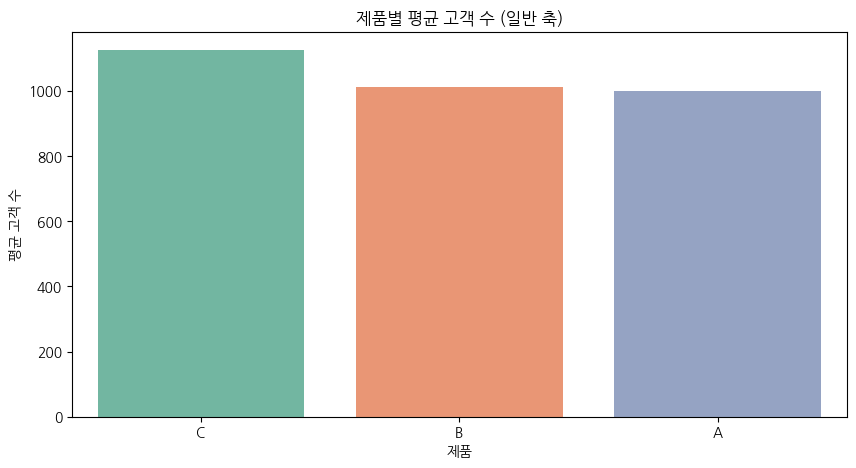

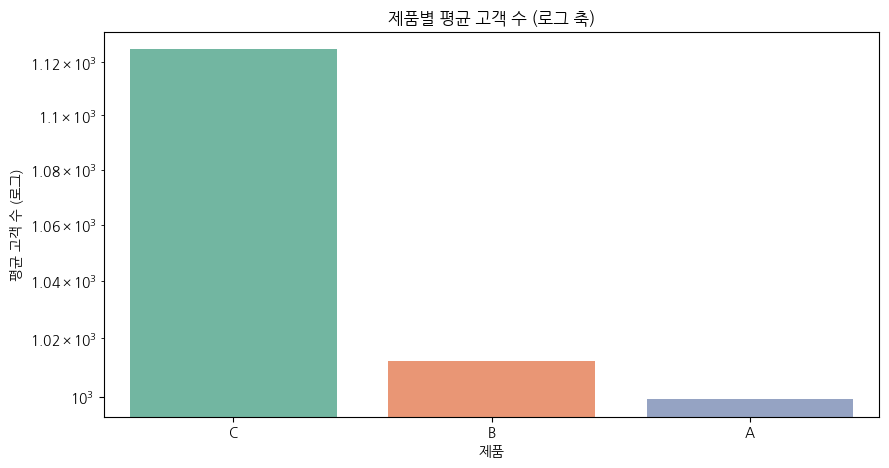

In [68]:
# TODO: 제품별 평균 고객수를 막대그래프로 그리고, 두 번째 그래프는 y축 로그 스케일로 표현하세요.
# 1️⃣ 제품별 평균 고객 수 계산
avg_customers = df.groupby('제품')['고객수'].mean().sort_values(ascending=False)

# 2️⃣ 일반 축 그래프
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_customers.index, y=avg_customers.values, palette='Set2')
plt.title('제품별 평균 고객 수 (일반 축)')
plt.ylabel('평균 고객 수')
plt.xlabel('제품')
plt.show()

# 3️⃣ 로그 축 그래프
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_customers.index, y=avg_customers.values, palette='Set2')
plt.yscale('log')
plt.title('제품별 평균 고객 수 (로그 축)')
plt.ylabel('평균 고객 수 (로그)')
plt.xlabel('제품')
plt.show()

## 문제 1️⃣2️⃣: 이상치 강조 (색상 강조)

- 월별 총 매출을 막대그래프로 그리되,
  평균보다 높은 달은 빨간색, 낮은 달은 파란색으로 칠하세요.
- 제목: `월별 매출 (평균 대비 강조)`

In [75]:
mean_sales = df['매출'].mean()
colors = ['red' if x >= mean_sales else 'blue' for x in df['매출']]

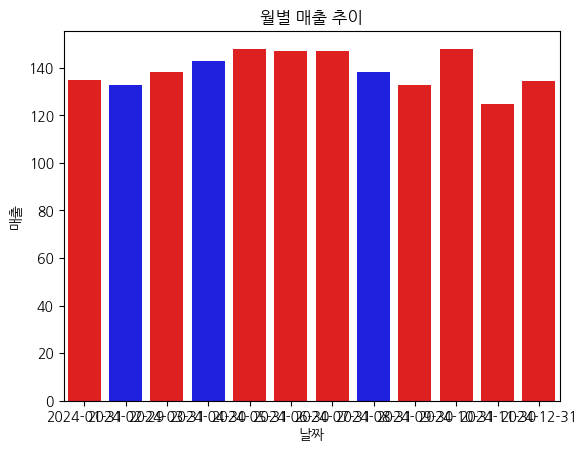

In [76]:
# TODO: 평균보다 높은 달은 빨간색, 낮은 달은 파란색으로 색을 다르게 지정하세요.
plt.figure()
sns.barplot(data=df, x='날짜', y='매출', palette=colors, ci=None)
plt.title('월별 매출 추이')
plt.grid=True
plt.show()

## 문제 1️⃣3️⃣: 주석(Annotation)으로 포인트 강조

- 월별 총 고객수를 선 그래프로 나타내세요.
- 가장 큰 값을 찍은 달에 화살표와 텍스트로 `고객 급증`이라고 표시하세요.
- 제목: `월별 고객 수 추이`

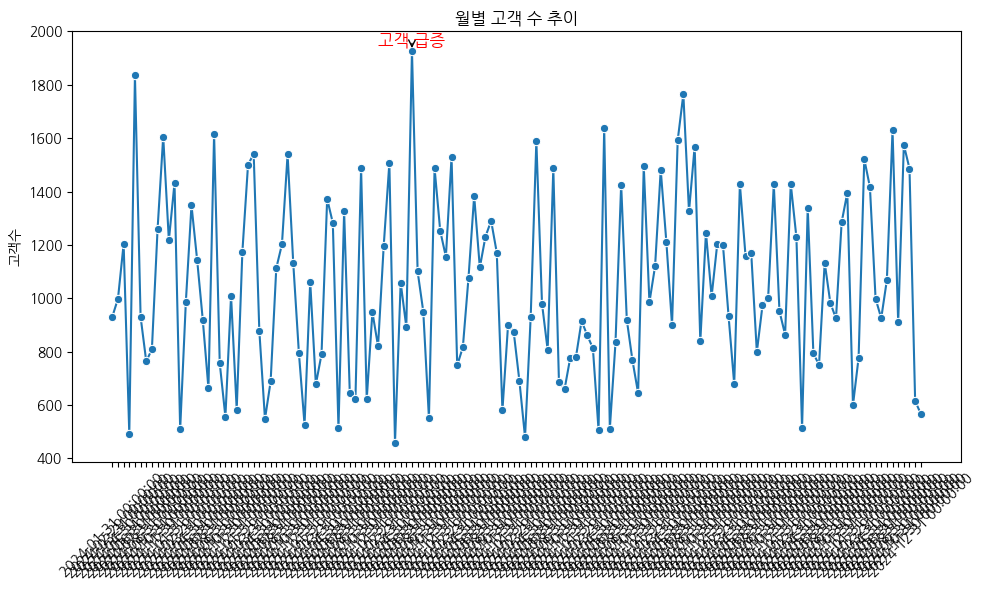

In [105]:
# x좌표 숫자로 변환
x_coords = range(len(df))
max_idx = df['고객수'].idxmax()
max_x = x_coords[max_idx]
max_value = df.loc[max_idx, '고객수']

plt.figure(figsize=(10,6))
sns.lineplot(x=x_coords, y=df['고객수'], marker='o', ci=None)
plt.title('월별 고객 수 추이')

# 화살표 표시
plt.annotate('고객 급증',
             xy=(max_x, max_value),
             xytext=(max_x, max_value + 20),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='red',
             ha='center')

# x축 레이블 복원
plt.xticks(x_coords, df['날짜'], rotation=45)

plt.tight_layout()
plt.show()

## 문제 1️⃣4️⃣: 3C 원칙 (Clarity / Consistency / Context)

- `카테고리`별 총 매출을 막대그래프로 나타내세요.
- 그래프에 아래 사항을 모두 반영하세요:
  - 제목에 기간(2024년)과 단위(매출 합계)를 명시할 것
  - x축/y축 라벨 추가
  - grid는 약하게 표시 (`alpha=0.3`)
  - legend는 숨기거나 frameon=False 로 처리해 시각적 노이즈 최소화
- 제목 예시: `2024년 카테고리별 매출 합계 (단위: 임의 금액)`

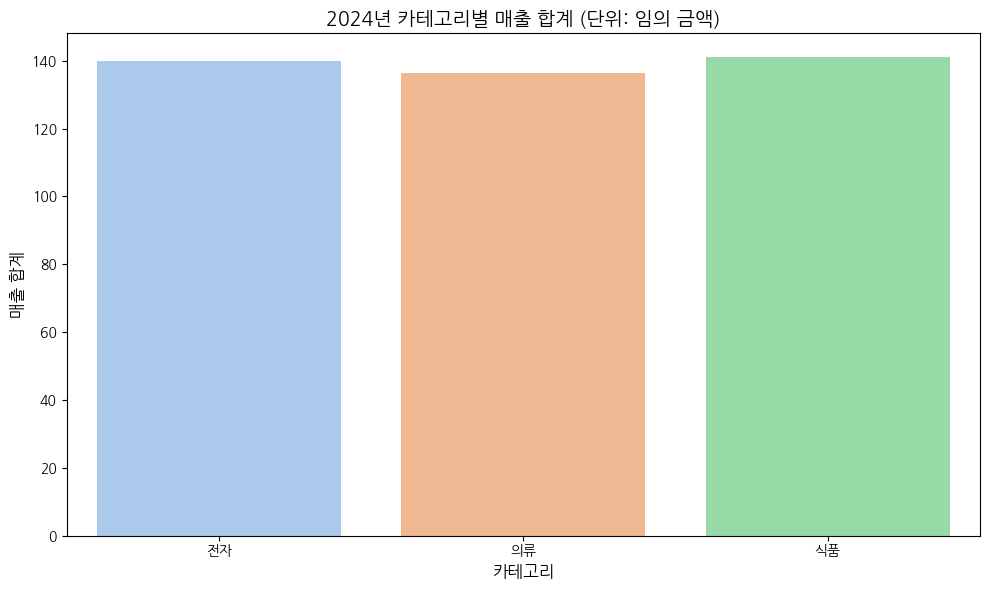

In [110]:
# TODO: 3C 원칙(명확성/일관성/맥락)을 지키는 카테고리별 매출 그래프를 작성하세요.
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='카테고리', y='매출', palette='pastel', ci=None)

# 제목, 축 라벨
plt.title('2024년 카테고리별 매출 합계 (단위: 임의 금액)', fontsize=14)
plt.xlabel('카테고리', fontsize=12)
plt.ylabel('매출 합계', fontsize=12)

# legend 숨기기
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

---
### ✅ 끝!
이 문제들로 라인, 막대, 그룹막대, 파이, 히스토그램, 박스, 산점도, 히트맵, twinx, 로그스케일, 강조색, 주석, 3C 원칙까지 모두 연습할 수 있습니다.
수업에서는 보통:
1. 문제만 있는 버전으로 실습 →
2. 정답 포함 버전으로 복습/해설
순서로 진행하면 효과가 매우 좋습니다.
